## About Dataset
### Context
Machine Learning with Python by Brett Lantz is a book that provides an introduction to machine learning using Python. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.

#### Content
##### Columns

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

## Inspiration

Can you accurately predict insurance costs?

In [2]:
# Importing all the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('CSV/insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Checking the info of the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# No of row in column
len(df)

1338

In [7]:
# Checking if there are null values present
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# Statical data for the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


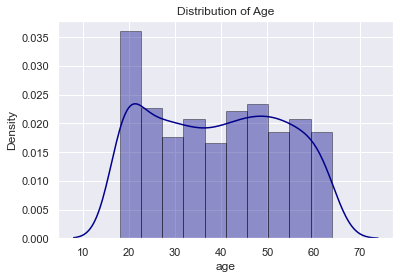

In [9]:
# Distribution of age 
sns.set()
sns.distplot(df['age'], hist=True, kde=True, 
             bins=10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'}
             )
plt.title('Distribution of Age')
plt.show()

* From above Graph it is clear more no. of people are in age group between 20-22
* For above 23 to 70 the graph is almost normal

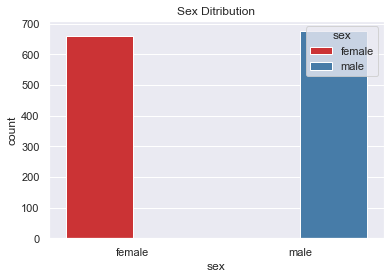

In [10]:
# Distribution of sex 
sns.countplot(x='sex',data=df,hue="sex",palette = "Set1")
plt.title('Sex Ditribution')
plt.show()

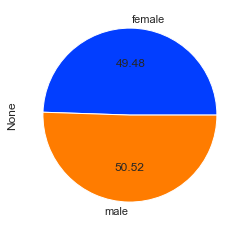

In [11]:
# Distribution of Sex
df.groupby('sex').size().plot(kind='pie', autopct='%.2f',colors=sns.color_palette('bright')[0:5])
plt.show()

* From above we can say both Male and Female canditate are taking insurances at same level with a difference of 0.08 % in favour of Male

In [12]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

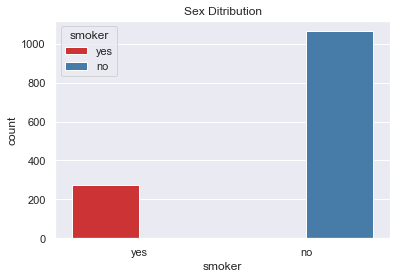

In [13]:
# Distribution of Smokers
sns.countplot(x='smoker',data=df,hue="smoker",palette = "Set1")
plt.title('Sex Ditribution')
plt.show()

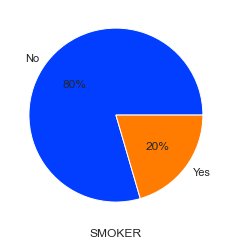

In [14]:
data = df.groupby('smoker').size()
palette_color = sns.color_palette('bright')
plt.pie(data,labels=['No','Yes'],colors=palette_color, autopct='%.0f%%')
plt.xlabel('SMOKER')
plt.show()

* From above it is clear that 80% of people are non-smokers

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


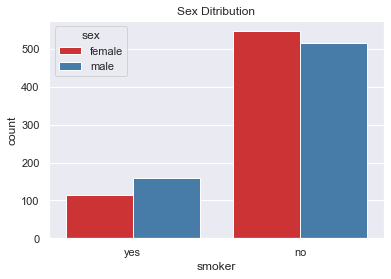

In [16]:
# Distribution of Male-Female Smokers
sns.countplot(x='smoker',data=df,hue="sex",palette = "Set1")
plt.title('Sex Ditribution')
plt.show()

* From above it is cleared that majority of female are non-smoker and in case of smokers male are more frequent smoker

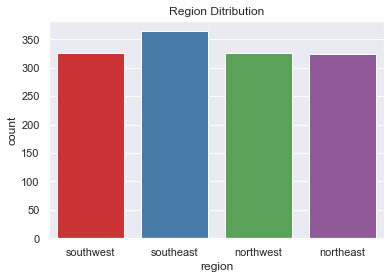

In [17]:
# Distribution of region
sns.countplot(x='region',data=df,palette = "Set1")
plt.title('Region Ditribution')
plt.show()

In [18]:
df.groupby('region').size()

region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64

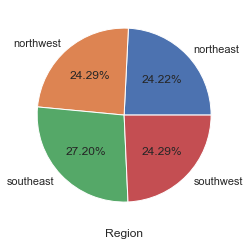

In [19]:
data = df.groupby('region').size()
palette_color = sns.color_palette()
plt.pie(data,colors=palette_color, autopct='%.2f%%',labels=['northeast','northwest','southeast','southwest'])
plt.xlabel('Region')
plt.show()

* From above it is quite clear people from south-east region are buying more insurance as comare to other region

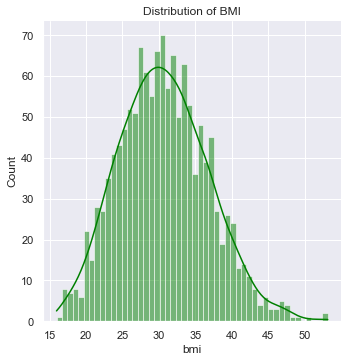

In [20]:
# Distribution of BMI
sns.displot(df.bmi,kde=True,color = 'green',bins=50)
plt.title('Distribution of BMI')
plt.show()

* The grpah look normally distributed for BMI and it is cleared more no. of people taking insurance are Overweight and Obese.
* Below 18.5--Underweight
* 18.5–24.9--Healthy
* 25–29.9--Overweight
* 30 and above--Obese

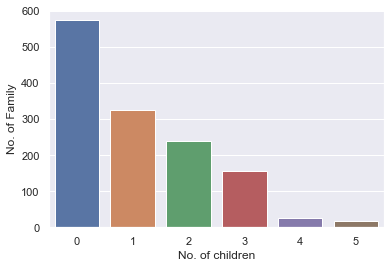

In [21]:
# Distribution of children
sns.countplot(x='children',data=df)
plt.xlabel('No. of children')
plt.ylabel('No. of Family')
plt.show()

* From above it is cleared that most of the family don't have any child

### Data Pre-Processing

* Converting all the the categorilcal data to numerial data
* Encoding the data now

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
# Encoding Sex Column
df.replace({'sex':{'male':0,'female':1}},inplace=True)

# Encoding smoker Column
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)

# Encoding region Column
df.replace({'region':{'southwest':0,'southeast':1,'northwest':2,'northeast':3}},inplace=True)

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


In [25]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.795217,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [26]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,0.025019,-0.002127,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,0.076185,0.004588,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,-0.003750,-0.157566,0.198341
children,0.042469,-0.017163,0.012759,1.000000,-0.007673,-0.016569,0.067998
smoker,0.025019,0.076185,-0.003750,-0.007673,1.000000,-0.002181,-0.787251
region,-0.002127,0.004588,-0.157566,-0.016569,-0.002181,1.000000,0.006208
charges,0.299008,-0.057292,0.198341,0.067998,-0.787251,0.006208,1.000000


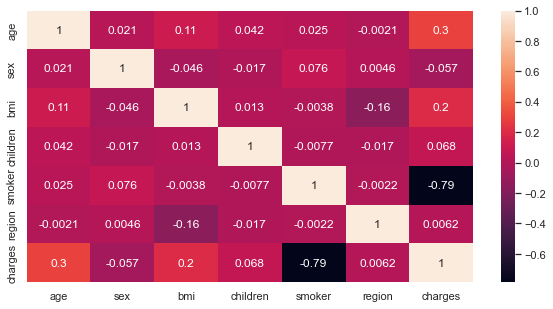

In [27]:
plt.figure(figsize=(10,5))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

* The -0.79 means that for smokers the charges will be high


## Getting ready for Model fiting 

In [28]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


In [29]:
# Dividing the data into target and features
X = df.iloc[:,:-1]
y = df['charges']

In [30]:
# Spliting the data into training and testing the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [31]:
# checking the shape of train test data
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [32]:
# Model Training
lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

#### ModelEvaluation

In [33]:
# Prediction on training Data
train_predictor = lr.predict(X_train)

In [34]:
# R square in train data
r2_train = metrics.r2_score(y_train,train_predictor)
print('R Squared Values: ',r2_train)

R Squared Values:  0.7519923667088932


In [35]:
# Adjusted R square in train data
adj_r2_train = 1 - (1-lr.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('Adjusted R Squared Values: ',adj_r2_train)

Adjusted R Squared Values:  0.7505925117702793


In [36]:
# Prediction on test Data
test_predictor = lr.predict(X_test)

In [37]:
# R square in test data
r2_test = metrics.r2_score(y_test,test_predictor)
print('R Squared Values: ',r2_test)

R Squared Values:  0.7445422986536503


In [38]:
# Adjusted R square in train data
adj_r2_test = 1 - (1-lr.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted R Squared Values: ',adj_r2_test)

Adjusted R Squared Values:  0.738669707818102


* From above we can see the vale for r-square are close for train and test data so there is no over or underfiting of data

### Buildng a predictive system

In [39]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


In [40]:
input_data=(31,1,25.74,0,1,0)

#changing input to a numpy array
np_input = np.asarray(input_data)

#reshape the array
np_input_reshape=np_input.reshape(1,-1)

price_predict = lr.predict(np_input_reshape)
print('The Insurance cost for the given input will be $',price_predict[0])

The Insurance cost for the given input will be $ 3587.8205586399545
